In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [37]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [38]:
# Load the main dataset
df = pd.read_excel(r'coffee_shop_sales_dataset.xlsx', sheet_name='Daily_Sales_Data')
print(f"✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

✓ Dataset loaded successfully!
Dataset shape: (365, 26)
Date range: 2023-01-01 to 2023-12-31


In [39]:
# Display basic info
print("\n📊 Dataset Overview:")
df.head()


📊 Dataset Overview:


,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Pastry_Sales,Sandwich_Sales,Daily_Revenue,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,45,17,411.11,160,135.3,42.10,200,537.40,-126.28,6.3
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,16,7,205.12,320,58.7,57.80,200,636.50,-431.38,7.3
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,25,12,459.23,400,112.4,42.33,200,754.73,-295.51,7.6
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,12,9,198.49,240,80.1,44.42,200,564.52,-366.03,4.8
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,17,11,201.65,240,63.1,49.47,200,552.57,-350.92,6.8


In [40]:
print("\n📈 Dataset Info:")
print(df.info())


📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   365 non-null    object 
 1   Day_of_Week            365 non-null    int64  
 2   Day_Name               365 non-null    object 
 3   Is_Weekend             365 non-null    int64  
 4   Month                  365 non-null    int64  
 5   Season                 365 non-null    object 
 6   Temperature_C          365 non-null    float64
 7   Is_Raining             365 non-null    int64  
 8   Rainfall_mm            365 non-null    float64
 9   Is_Holiday             365 non-null    int64  
 10  Promotion_Active       365 non-null    int64  
 11  Nearby_Events          365 non-null    int64  
 12  Staff_Count            365 non-null    int64  
 13  Machine_Issues         365 non-null    int64  
 14  Num_Customers          365 non-null    in

In [41]:
#Check for missing values
print(f"\n🔍 Missing values: {df.isnull().sum()}")


🔍 Missing values: Date                     0
Day_of_Week              0
Day_Name                 0
Is_Weekend               0
Month                    0
Season                   0
Temperature_C            0
Is_Raining               0
Rainfall_mm              0
Is_Holiday               0
Promotion_Active         0
Nearby_Events            0
Staff_Count              0
Machine_Issues           0
Num_Customers            0
Coffee_Sales             0
Pastry_Sales             0
Sandwich_Sales           0
Daily_Revenue            0
Staff_Cost               0
Ingredient_Cost          0
Utilities_Cost           0
Rent_Cost                0
Total_Costs              0
Daily_Profit             0
Customer_Satisfaction    0
dtype: int64


In [42]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [43]:
# Create additional time-based features
df['Day_of_Year'] = df['Date'].dt.dayofyear
df['Week_of_Year'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter

In [44]:
df.head()

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction,Day_of_Year,Week_of_Year,Quarter
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,160,135.3,42.10,200,537.40,-126.28,6.3,1,52,1
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,320,58.7,57.80,200,636.50,-431.38,7.3,2,1,1
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,400,112.4,42.33,200,754.73,-295.51,7.6,3,1,1
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,240,80.1,44.42,200,564.52,-366.03,4.8,4,1,1
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,240,63.1,49.47,200,552.57,-350.92,6.8,5,1,1


[red, green, blue, green, red] --> [2,1,0,1,2]  -->[blue, green, red]  -- blue -0, green - 1, red - 2

In [45]:
# Encode categorical variables   #fit(), transform() fit_transform()
le = LabelEncoder()
df['Day_Name_Encoded'] = le.fit_transform(df['Day_Name'])
df['Season_Encoded'] = le.fit_transform(df['Season'])

In [46]:
df.head()

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction,Day_of_Year,Week_of_Year,Quarter,Day_Name_Encoded,Season_Encoded
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,42.10,200,537.40,-126.28,6.3,1,52,1,3,3
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,57.80,200,636.50,-431.38,7.3,2,1,1,1,3
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,42.33,200,754.73,-295.51,7.6,3,1,1,5,3
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,44.42,200,564.52,-366.03,4.8,4,1,1,6,3
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,49.47,200,552.57,-350.92,6.8,5,1,1,4,3


In [47]:
# Select features for modeling (exclude target and non-predictive columns)
exclude_cols = ['Date', 'Day_Name', 'Season', 'Daily_Revenue', 'Staff_Cost', 
                'Ingredient_Cost', 'Utilities_Cost', 'Rent_Cost', 'Total_Costs', 
                'Daily_Profit']

In [48]:
feature_cols = [col for col in df.columns if col not in exclude_cols]
X = df[feature_cols]
y = df['Daily_Revenue']

In [49]:
print(f"✓ Features selected: {len(feature_cols)} columns")
print(f"✓ Target variable: Daily_Revenue")

✓ Features selected: 21 columns
✓ Target variable: Daily_Revenue


In [50]:
feature_cols

['Day_of_Week',
 'Is_Weekend',
 'Month',
 'Temperature_C',
 'Is_Raining',
 'Rainfall_mm',
 'Is_Holiday',
 'Promotion_Active',
 'Nearby_Events',
 'Staff_Count',
 'Machine_Issues',
 'Num_Customers',
 'Coffee_Sales',
 'Pastry_Sales',
 'Sandwich_Sales',
 'Customer_Satisfaction',
 'Day_of_Year',
 'Week_of_Year',
 'Quarter',
 'Day_Name_Encoded',
 'Season_Encoded']

In [51]:
# Display feature list
print("\n📋 Features used in model:")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")


📋 Features used in model:
 1. Day_of_Week
 2. Is_Weekend
 3. Month
 4. Temperature_C
 5. Is_Raining
 6. Rainfall_mm
 7. Is_Holiday
 8. Promotion_Active
 9. Nearby_Events
10. Staff_Count
11. Machine_Issues
12. Num_Customers
13. Coffee_Sales
14. Pastry_Sales
15. Sandwich_Sales
16. Customer_Satisfaction
17. Day_of_Year
18. Week_of_Year
19. Quarter
20. Day_Name_Encoded
21. Season_Encoded


In [52]:
# Basic statistics
print("\nTarget Variable (Daily_Revenue) Statistics:")
print(f"Mean: ${y.mean():.2f}")
print(f"Median: ${y.median():.2f}")
print(f"Std Dev: ${y.std():.2f}")
print(f"Min: ${y.min():.2f}")
print(f"Max: ${y.max():.2f}")


Target Variable (Daily_Revenue) Statistics:
Mean: $318.04
Median: $313.43
Std Dev: $104.61
Min: $50.00
Max: $698.79


In [53]:
# Correlation analysis
print("\n🔗 Top 10 Features Correlated with Daily Revenue:")
correlations = df[feature_cols + ['Daily_Revenue']].corr()['Daily_Revenue'].sort_values(ascending=False)
print(correlations.head(11)[1:])  # Exclude self-correlation


🔗 Top 10 Features Correlated with Daily Revenue:
Coffee_Sales             0.850058
Num_Customers            0.826685
Pastry_Sales             0.709539
Sandwich_Sales           0.599494
Nearby_Events            0.314505
Customer_Satisfaction    0.310457
Is_Weekend               0.309296
Day_of_Week              0.272246
Temperature_C            0.269180
Staff_Count              0.266494
Name: Daily_Revenue, dtype: float64


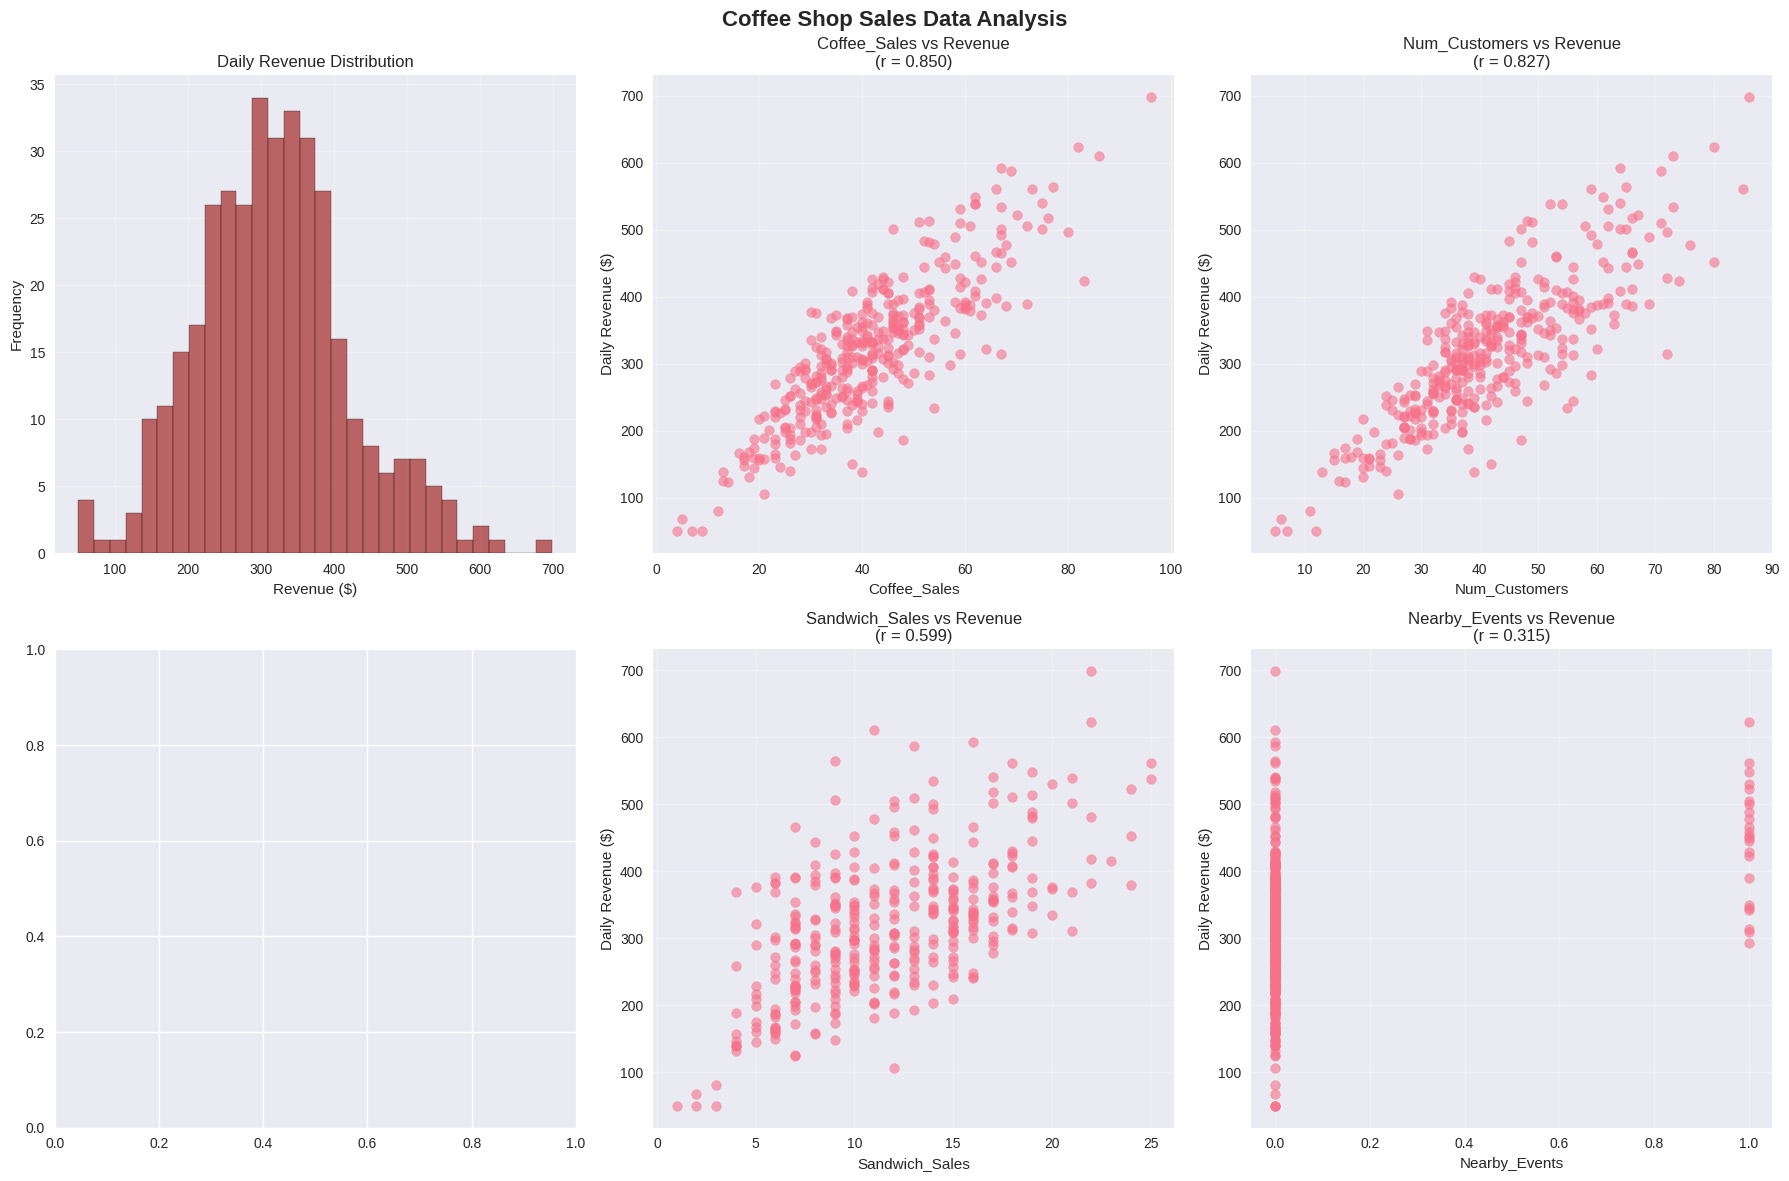

"You're getting the top 5 features most correlated with Daily Revenue.\n\n.head(6) picks top 6 (including the revenue itself), then [1:] skips the first (self-correlation).\nenumerate(top_features)\n➔ Loop over the features with their index.\n\nif i < 5:\n➔ Only do this for the top 5 features.\n\nrow = i // 3 and col = (i + 1) % 3\n➔ Smart way to position the scatter plots in the 2×3 grid without overlapping the histogram at (0, 0).\n\nif row == 0 and col == 0:\n➔ Skip the position (0, 0) since it's already used by histogram.\n\nscatter(df[feature], y, alpha=0.6)\n➔ Scatter plot of feature vs Daily Revenue with some transparency.\n\n.set_title()\n➔ Title includes correlation coefficient (r value) with revenue.\n\nplt.tight_layout()\n➔ Adjusts spacing so labels and titles don't overlap.\n\nplt.show()\n➔ Displays the figure."

In [54]:
# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Coffee Shop Sales Data Analysis', fontsize=16, fontweight='bold')

"""plt.subplots(2, 3)
➔ Creates a grid of 2 rows and 3 columns of subplots (total 6 plots).
➔ axes is a 2D array of axes objects for each subplot.

figsize=(18, 12)
➔ Size of the overall figure (18 inches wide x 12 inches tall).

fig.suptitle()
➔ Adds a big main title on top of the entire figure.
"""

# Revenue distribution
axes[0, 0].hist(y, bins=30, alpha=0.7, color='brown', edgecolor='black')
axes[0, 0].set_title('Daily Revenue Distribution')
axes[0, 0].set_xlabel('Revenue ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

"""axes[0, 0]
➔ Refers to the subplot at first row, first column.

.hist(y, bins=30)
➔ Plots a histogram of the Daily Revenue with 30 bins.

alpha=0.7
➔ Transparency of the histogram bars.

color='brown', edgecolor='black'
➔ Brown bars with black edges for better visibility.

grid(True, alpha=0.3)
➔ Adds gridlines to the plot with light transparency."""

# Top correlations
top_features = correlations.head(6)[1:].index  # Top 5 excluding self
for i, feature in enumerate(top_features):
    if i < 5:
        row = i // 3
        col = (i + 1) % 3
        if row == 0 and col == 0:
            continue  # Skip first position (already used)
        axes[row, col].scatter(df[feature], y, alpha=0.6)
        axes[row, col].set_title(f'{feature} vs Revenue\n(r = {correlations[feature]:.3f})')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Daily Revenue ($)')
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

"""You're getting the top 5 features most correlated with Daily Revenue.

.head(6) picks top 6 (including the revenue itself), then [1:] skips the first (self-correlation).
enumerate(top_features)
➔ Loop over the features with their index.

if i < 5:
➔ Only do this for the top 5 features.

row = i // 3 and col = (i + 1) % 3
➔ Smart way to position the scatter plots in the 2×3 grid without overlapping the histogram at (0, 0).

if row == 0 and col == 0:
➔ Skip the position (0, 0) since it's already used by histogram.

scatter(df[feature], y, alpha=0.6)
➔ Scatter plot of feature vs Daily Revenue with some transparency.

.set_title()
➔ Title includes correlation coefficient (r value) with revenue.

plt.tight_layout()
➔ Adjusts spacing so labels and titles don't overlap.

plt.show()
➔ Displays the figure."""


🔗 Top 10 Features for Heatmap: ['Coffee_Sales', 'Num_Customers', 'Pastry_Sales', 'Sandwich_Sales', 'Nearby_Events', 'Customer_Satisfaction', 'Is_Weekend', 'Day_of_Week', 'Temperature_C', 'Staff_Count']


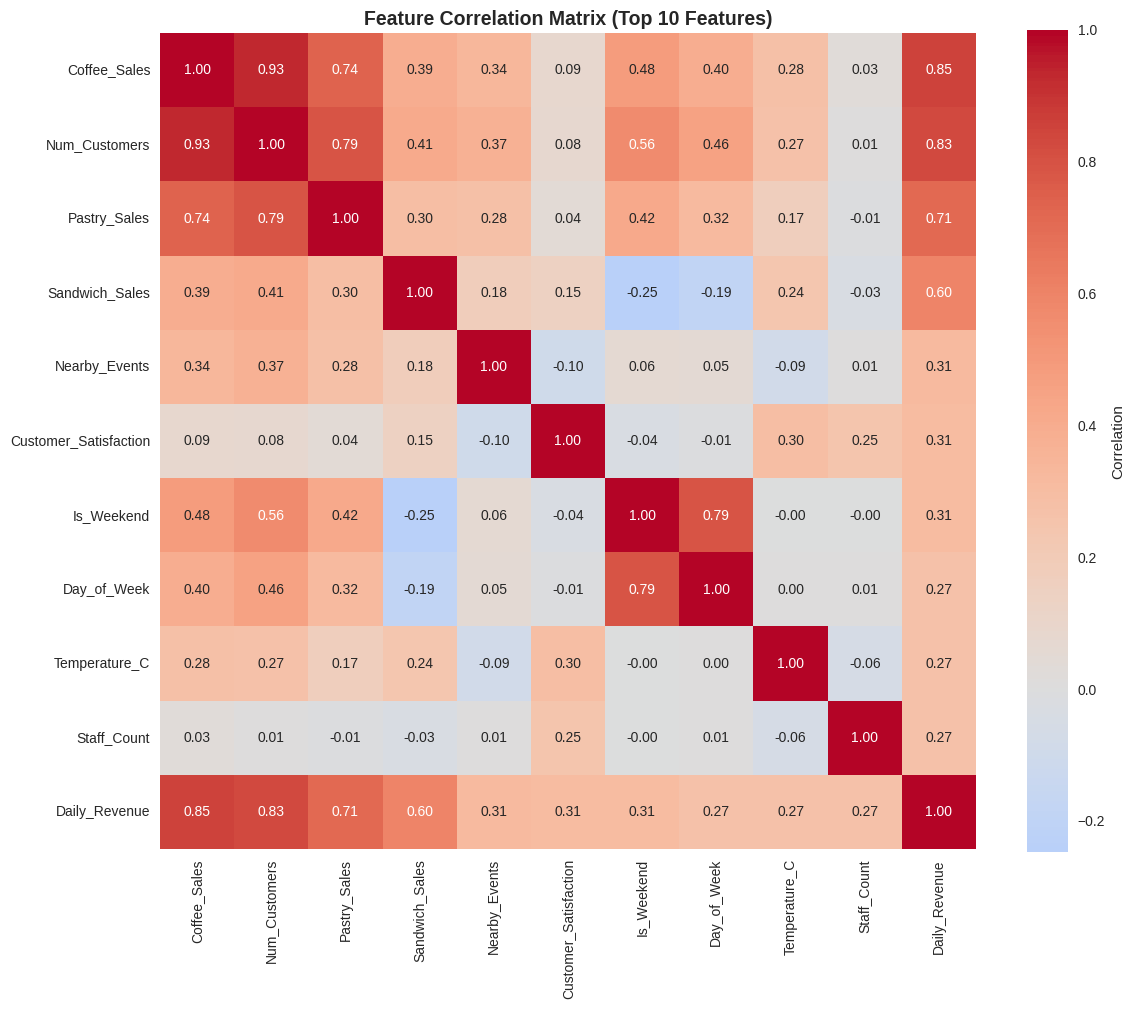

In [55]:
# Feature correlation heatmap
plt.figure(figsize=(12, 10))
# Select subset of most important features for readability
important_features = correlations.head(11)[1:].index[:10]
print(f"\n🔗 Top 10 Features for Heatmap: {list(important_features)}")
corr_matrix = df[list(important_features) + ['Daily_Revenue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix (Top 10 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [56]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

print(f"\n📊 Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


📊 Data Split:
Training set: 292 samples
Test set: 73 samples


🧮 What is Feature Scaling?

Feature scaling means bringing all input features to the same scale, usually with mean = 0 and standard deviation = 1.

For example:

- Some features may be in lakhs (₹) like revenue

- Some may be in 0–10 scale like satisfaction score

- Some may be binary (0/1)

If we don’t scale, features with larger ranges can dominate the model's learning process.

📏 Why StandardScaler?

scaler = StandardScaler()

StandardScaler subtracts the mean and divides by the standard deviation for each feature.

After scaling:

Mean = 0

Standard Deviation = 1

This is especially important for regression models, gradient descent algorithms, and distance-based models.

🏋️ Fit and Transform the Training Data

X_train_scaled = scaler.fit_transform(X_train)

.fit() learns the mean and standard deviation from X_train.

.transform() uses those values to scale X_train data.

⚠️ Important:

We always fit only on the training set to prevent data leakage from the test set.

🛠️ Transform the Test Data Using the Same Scaler

X_test_scaled = scaler.transform(X_test)

Now, we only transform X_test using the mean and std learned from training data.

Why?

We want the model to see test data under the same conditions as training data — this ensures fair evaluation.

✅ Why are we using it here?

- Linear Regression works better and converges faster when features are scaled.

- Helps avoid issues caused by large variations in data range.

- Makes coefficients easier to interpret.

- Prepares the data before applying feature selection and model training.


z = (x - mean)/SD   -- mean = 20, SD = 13   --> (50 - 20)/13

[[50], [60]] -->  [[-1.414], [-0.707]]  

In [57]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
X_train_scaled

array([[-1.51551436, -0.64080264,  0.12558378, ...,  0.43428383,
        -0.94381775,  0.51017365],
       [-0.02216163, -0.64080264,  1.61625303, ...,  1.3465923 ,
         0.56767101,  1.41853161],
       [ 0.97340686,  1.56054289,  0.12558378, ...,  0.43428383,
        -0.43998817,  0.51017365],
       ...,
       [-0.02216163, -0.64080264,  0.72185148, ...,  0.43428383,
         0.56767101, -1.30654228],
       [ 0.47562262, -0.64080264,  1.61625303, ...,  1.3465923 ,
        -1.44764734,  1.41853161],
       [-0.02216163, -0.64080264, -0.76881777, ..., -0.47802464,
         0.56767101, -0.39818431]])

🎯 Feature Selection using SelectKBest

After scaling, we select the most relevant features to improve model performance.

This helps reduce noise, avoid overfitting, and make the model faster.

✅ Step-by-Step Explanation:

selector = SelectKBest(score_func=f_regression, k=15)

SelectKBest: A feature selection method from sklearn that selects the top K features based on statistical tests.

f_regression: The scoring function that measures the linear correlation between each feature and the target variable (y_train).

k=15: We are selecting the top 15 features with the highest correlation (you can adjust this number).


X_train_selected = selector.fit_transform(X_train_scaled, y_train)

fit_transform() on Training Data:

fit() calculates the F-statistic and p-values between each feature in X_train_scaled and the target y_train.

transform() selects the top 15 features and removes the rest.

This reduces the number of input features for the model.


X_test_selected = selector.transform(X_test_scaled)

Apply transform() only on X_test_scaled.

We don't fit() on test data to avoid data leakage.

This ensures we evaluate our model on unseen data with the same selected features.

selected_features = X.columns[selector.get_support()]

get_support() returns a boolean mask of selected features.

We use it to get the actual names of the selected features for display or interpretation.


print(f"\n🎯 Feature Selection: Top {len(selected_features)} features selected")

print("Selected features:", list(selected_features))

Prints the number of selected features and their names.

Helps us understand which features are contributing to the model.

📝 In Simple Words:

We select the top 15 most useful features based on how strongly they are related to the target (Daily Revenue).

This simplifies the model, makes it faster, and may improve prediction accuracy.

In [59]:
print("✓ Features scaled using StandardScaler")

# Feature selection (optional - select top K features)
selector = SelectKBest(score_func=f_regression, k=15)  # Select top 15 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print(f"\n🎯 Feature Selection: Top {len(selected_features)} features selected")
print("Selected features:", list(selected_features))

✓ Features scaled using StandardScaler

🎯 Feature Selection: Top 15 features selected
Selected features: ['Day_of_Week', 'Is_Weekend', 'Temperature_C', 'Is_Raining', 'Rainfall_mm', 'Is_Holiday', 'Promotion_Active', 'Nearby_Events', 'Staff_Count', 'Machine_Issues', 'Num_Customers', 'Coffee_Sales', 'Pastry_Sales', 'Sandwich_Sales', 'Customer_Satisfaction']


In [60]:
# Create and train the linear regression model
print("\n🤖 Training Linear Regression Model:")
model = LinearRegression()
model.fit(X_train_selected, y_train)
print("✓ Model trained successfully")


🤖 Training Linear Regression Model:
✓ Model trained successfully


In [61]:
# Make predictions
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

In [62]:
# Calculate comprehensive metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Additional metrics
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n📊 {dataset_name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"MAE: ${mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    return {'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

What it does:

MAPE measures the average percentage error between the actual values (y_true) and the predicted values (y_pred).

How it's calculated:

- (y_true - y_pred) → Difference (error) between actual and predicted values.

- np.abs(...) → Take absolute value so negative errors don’t cancel out positive ones.

- ... / y_true → Divide by actual values to convert to a percentage error.

- np.mean(...) → Average across all samples.

- * 100 → Convert it into a percentage.

Why use it:

MAPE is useful when you want to express prediction error as a percentage — easy for business interpretation.

In [63]:
# Evaluate model performance
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Test")


📊 Training Set Performance:
R² Score: 0.9573
RMSE: $21.05
MAE: $16.15
MAPE: 5.63%

📊 Test Set Performance:
R² Score: 0.9465
RMSE: $25.20
MAE: $19.75
MAPE: 9.59%


### Training set performance

| Metric               | Value                                                                                                                                                                         | What it Means |
| -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------- |
| **R² Score: 0.9573** | The model explains **95.73%** of the variance in the training data. This is a high score, meaning the model fits the training data very well.                                 |               |
| **RMSE: \$21.05**    | On average, the predicted revenue is **\$21.05 off** from the actual value. RMSE penalizes larger errors more than smaller ones.                                              |               |
| **MAE: \$16.15**     | The model’s prediction is **\$16.15 off on average** (without squaring errors). Easier to interpret than RMSE.                                                                |               |
| **MAPE: 5.63%**      | On average, the model’s predictions are **5.63% away from the actual values** in percentage terms. This is a low percentage error, indicating high accuracy on training data. |               |


### Test set performance

| Metric               | Value                                                                                                                   | What it Means |
| -------------------- | ----------------------------------------------------------------------------------------------------------------------- | ------------- |
| **R² Score: 0.9465** | The model explains **94.65%** of the variance in unseen test data. Very good generalization.                            |               |
| **RMSE: \$25.20**    | On unseen data, predictions are **\$25.20 off on average** (slightly higher error than training, which is expected).    |               |
| **MAE: \$19.75**     | Average absolute error on test data is **\$19.75**, slightly higher than on training.                                   |               |
| **MAPE: 9.59%**      | Predictions on test data are, on average, **9.59% away from actual values**. Still acceptable for business forecasting. |               |


In [64]:
# Check for overfitting
print(f"\n🔍 Overfitting Check:")
print(f"R² difference (Train - Test): {train_metrics['R2'] - test_metrics['R2']:.4f}")
if abs(train_metrics['R2'] - test_metrics['R2']) < 0.05:
    print("✓ Model appears to generalize well (low overfitting)")
else:
    print("⚠️ Potential overfitting detected")


🔍 Overfitting Check:
R² difference (Train - Test): 0.0108
✓ Model appears to generalize well (low overfitting)


In [65]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n🎯 Feature Importance (Top 10):")
print(feature_importance.head(10))


🎯 Feature Importance (Top 10):
             Feature  Coefficient  Abs_Coefficient
11      Coffee_Sales    58.319920        58.319920
13    Sandwich_Sales    36.835447        36.835447
8        Staff_Count    27.585070        27.585070
12      Pastry_Sales    23.947659        23.947659
9     Machine_Issues   -21.685919        21.685919
6   Promotion_Active   -12.814379        12.814379
7      Nearby_Events    -3.409631         3.409631
1         Is_Weekend     2.622203         2.622203
4        Rainfall_mm     2.364927         2.364927
10     Num_Customers     1.952584         1.952584


We want to understand how the model makes predictions by:

* Seeing the model’s intercept (baseline value)

* Identifying which features influence the revenue the most

* Knowing whether each feature increases or decreases revenue

In [66]:
# Model interpretation
print(f"\n📋 Model Interpretation:")
print(f"Intercept: ${model.intercept_:.2f}")


📋 Model Interpretation:
Intercept: $325.78


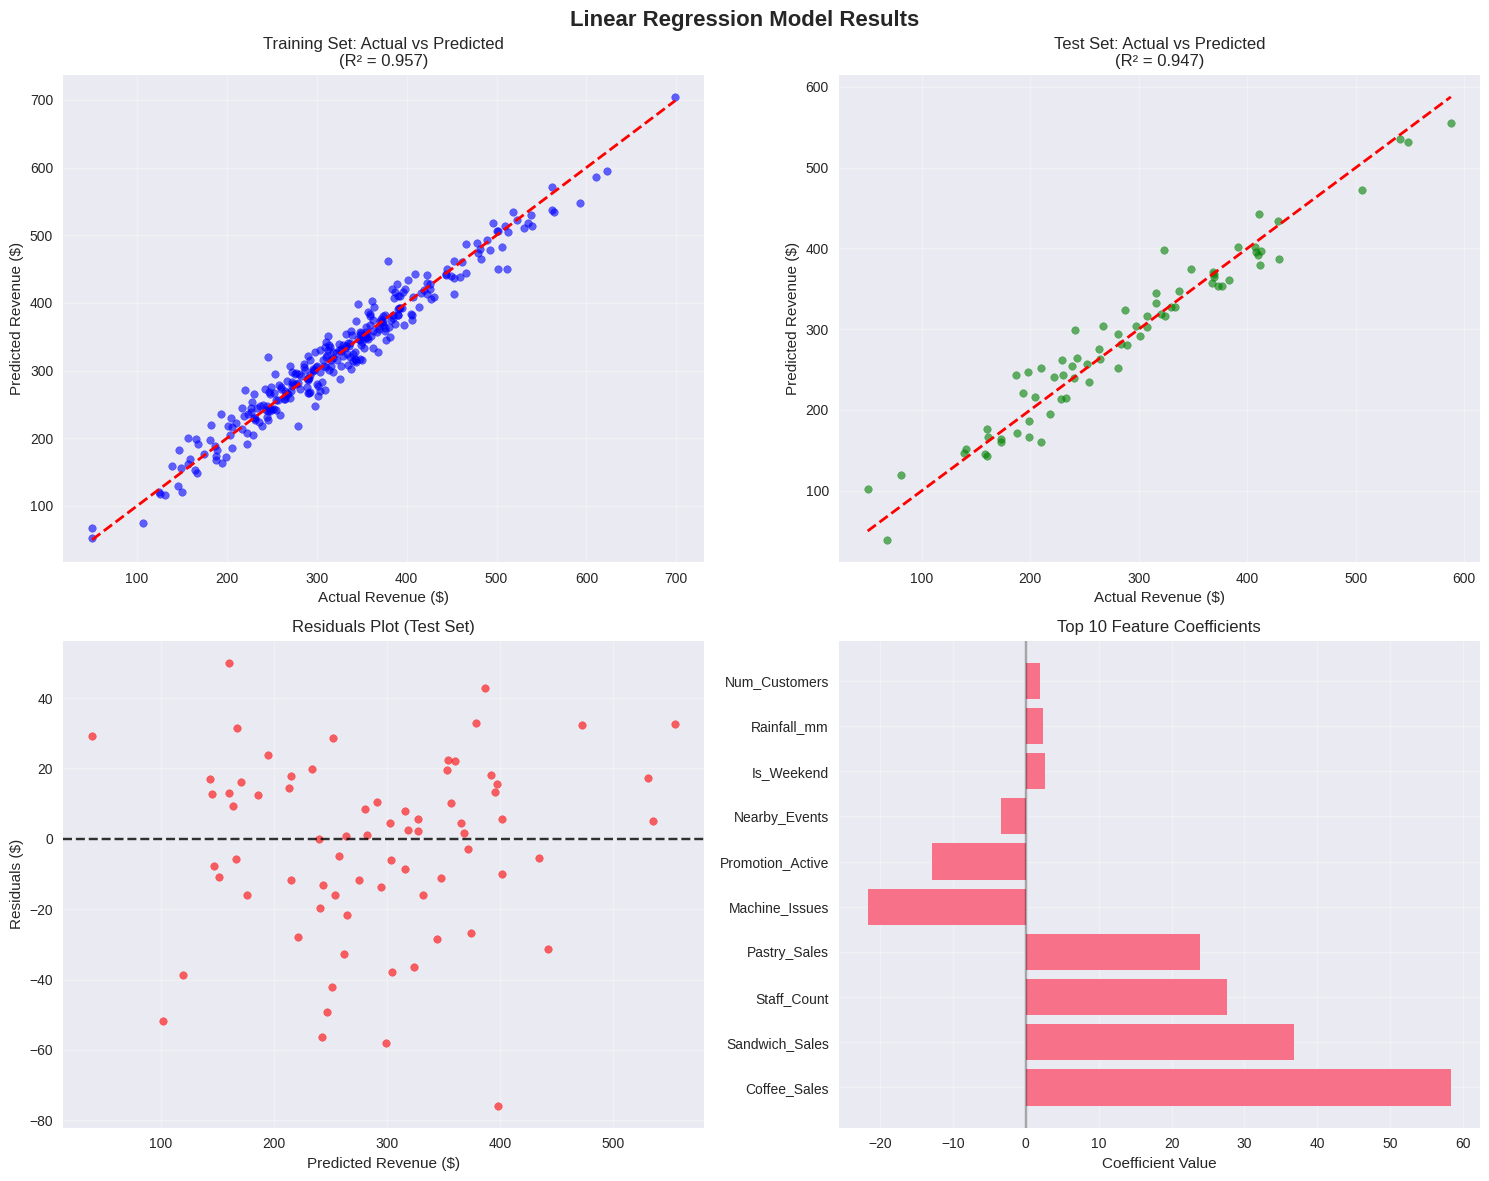

In [67]:
# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Linear Regression Model Results', fontsize=16, fontweight='bold')

# Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_pred_train, alpha=0.6, color='blue', s=30)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Revenue ($)')
axes[0, 0].set_ylabel('Predicted Revenue ($)')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\n(R² = {train_metrics["R2"]:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.6, color='green', s=30)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Revenue ($)')
axes[0, 1].set_ylabel('Predicted Revenue ($)')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\n(R² = {test_metrics["R2"]:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# Residuals plot
residuals_test = y_test - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals_test, alpha=0.6, color='red', s=30)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[1, 0].set_xlabel('Predicted Revenue ($)')
axes[1, 0].set_ylabel('Residuals ($)')
axes[1, 0].set_title('Residuals Plot (Test Set)')
axes[1, 0].grid(True, alpha=0.3)

# Feature importance
top_features_plot = feature_importance.head(10)
axes[1, 1].barh(range(len(top_features_plot)), top_features_plot['Coefficient'])
axes[1, 1].set_yticks(range(len(top_features_plot)))
axes[1, 1].set_yticklabels(top_features_plot['Feature'])
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_title('Top 10 Feature Coefficients')
axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Insights from Each Plot

### 🔹 Top Left: Training Set – Actual vs Predicted

📊 Insight:

The points are very close to the red dashed line (y = x), showing a strong fit to the training data.

R² = 0.957 means that 95.7% of the variation in actual revenue is explained by the model.

The model learned well from the training data with very low error.

✅ Conclusion: The model fits the training data very well.

### 🔹 Top Right: Test Set – Actual vs Predicted

📊 Insight:

Test data points also lie close to the red dashed line, indicating good generalization.

R² = 0.947 shows very good predictive performance on unseen data.

No major overfitting is observed (since train R² ≈ test R²).

✅ Conclusion: The model is reliable and generalizes well to new data.

### 🔹 Bottom Left: Residuals Plot (Test Set)

📊 Insight:

Residuals are scattered randomly around zero, which is good.

There’s no obvious pattern or curve, meaning the model doesn't miss any important non-linear relationship.

A few outliers exist (e.g., errors above 40 or below -60), but most residuals are within a small range.

✅ Conclusion:

Model has low bias and errors are mostly well-behaved.

A few outliers might need further investigation (possibly data entry issues or rare events).

### 🔹 Bottom Right: Top 10 Feature Coefficients

📊 Insight:

Features with high positive coefficients (e.g., Coffee_Sales, Sandwich_Sales) are strong drivers of revenue.

Features like Machine_Issues, Promotion_Active, and Nearby_Events have negative coefficients, meaning they reduce predicted revenue.

E.g., Machine_Issues might reduce customer satisfaction → fewer sales.

Surprisingly, Promotion_Active might be ineffective or poorly timed.

✅ Conclusion:

Business can focus on improving top features (like coffee/sandwich sales).

Investigate why promotions and events are not positively impacting revenue.

Reduce machine issues to avoid revenue loss.

## 🧠 Overall Insights Summary

✅ High model accuracy on both training and test data (R² > 0.94)

📈 Coffee and Sandwich Sales are top drivers of revenue.

❗ Machine Issues and ineffective promotions negatively impact revenue.

📉 Residuals are random, indicating no major model bias.

📊 Model is interpretable and provides actionable business recommendations.

In [68]:
# Example predictions
print(f"\n🔮 Example Predictions:")
print("-" * 40)

# Create sample scenarios
scenarios = [
    {
        'name': 'Perfect Weekend Day',
        'data': {
            'Day_of_Week': 7, 'Is_Weekend': 1, 'Month': 6, 'Temperature_C': 25,
            'Is_Raining': 0, 'Rainfall_mm': 0, 'Is_Holiday': 0, 'Promotion_Active': 1,
            'Nearby_Events': 1, 'Staff_Count': 5, 'Machine_Issues': 0, 'Num_Customers': 70,
            'Coffee_Sales': 85, 'Pastry_Sales': 45, 'Sandwich_Sales': 25,
            'Customer_Satisfaction': 9.0, 'Day_of_Year': 150, 'Week_of_Year': 25,
            'Quarter': 2, 'Day_Name_Encoded': 6, 'Season_Encoded': 3
        }
    },
    {
        'name': 'Rainy Weekday',
        'data': {
            'Day_of_Week': 2, 'Is_Weekend': 0, 'Month': 11, 'Temperature_C': 8,
            'Is_Raining': 1, 'Rainfall_mm': 5.5, 'Is_Holiday': 0, 'Promotion_Active': 0,
            'Nearby_Events': 0, 'Staff_Count': 3, 'Machine_Issues': 0, 'Num_Customers': 25,
            'Coffee_Sales': 30, 'Pastry_Sales': 15, 'Sandwich_Sales': 8,
            'Customer_Satisfaction': 6.5, 'Day_of_Year': 300, 'Week_of_Year': 45,
            'Quarter': 4, 'Day_Name_Encoded': 1, 'Season_Encoded': 0
        }
    },
    {
        'name': 'Average Day',
        'data': {
            'Day_of_Week': 4, 'Is_Weekend': 0, 'Month': 4, 'Temperature_C': 18,
            'Is_Raining': 0, 'Rainfall_mm': 0, 'Is_Holiday': 0, 'Promotion_Active': 0,
            'Nearby_Events': 0, 'Staff_Count': 3, 'Machine_Issues': 0, 'Num_Customers': 45,
            'Coffee_Sales': 50, 'Pastry_Sales': 22, 'Sandwich_Sales': 15,
            'Customer_Satisfaction': 7.5, 'Day_of_Year': 100, 'Week_of_Year': 15,
            'Quarter': 2, 'Day_Name_Encoded': 3, 'Season_Encoded': 2
        }
    }
]

for scenario in scenarios:
    sample_df = pd.DataFrame([scenario['data']])
    sample_scaled = scaler.transform(sample_df)
    sample_selected = selector.transform(sample_scaled)
    prediction = model.predict(sample_selected)[0]
    
    print(f"\n{scenario['name']}:")
    print(f"  Predicted Revenue: ${prediction:.2f}")
    key_features = ['Num_Customers', 'Temperature_C', 'Is_Weekend', 'Promotion_Active', 'Staff_Count']
    for feature in key_features:
        if feature in scenario['data']:
            print(f"  {feature}: {scenario['data'][feature]}")


🔮 Example Predictions:
----------------------------------------

Perfect Weekend Day:
  Predicted Revenue: $684.30
  Num_Customers: 70
  Temperature_C: 25
  Is_Weekend: 1
  Promotion_Active: 1
  Staff_Count: 5

Rainy Weekday:
  Predicted Revenue: $221.12
  Num_Customers: 25
  Temperature_C: 8
  Is_Weekend: 0
  Promotion_Active: 0
  Staff_Count: 3

Average Day:
  Predicted Revenue: $374.22
  Num_Customers: 45
  Temperature_C: 18
  Is_Weekend: 0
  Promotion_Active: 0
  Staff_Count: 3


In [69]:
# Summary
print(f"\n📊 Model Summary:")
print(f"✓ Model successfully trained on {len(X_train)} samples")
print(f"✓ Test R² Score: {test_metrics['R2']:.4f}")
print(f"✓ Test RMSE: ${test_metrics['RMSE']:.2f}")
print(f"✓ Model can predict coffee shop revenue with {test_metrics['R2']*100:.1f}% accuracy")
print(f"✓ Most important factor: {feature_importance.iloc[0]['Feature']}")


📊 Model Summary:
✓ Model successfully trained on 292 samples
✓ Test R² Score: 0.9465
✓ Test RMSE: $25.20
✓ Model can predict coffee shop revenue with 94.7% accuracy
✓ Most important factor: Coffee_Sales


## Save my model

In [70]:
import joblib

# Save the model
joblib.dump(model, 'coffee_sales_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the feature selector
joblib.dump(selector, 'feature_selector.pkl')

print("✅ Model, scaler, and selector saved successfully!")

✅ Model, scaler, and selector saved successfully!
